In [2]:
#website UI and conspiracy theory classifier


# TF-IDF (can try )
#add / separate data (url useless , separate words)
# try break urls e.g. https:\/\/www.zerohedge.com muight be conspiracy theory
# tokenizer for sklearn before tfidf
# concat the features into 1 set, instead of many features.
# split into multiple trainign samples. 1 long para , split into eg 20 samples for training.

# apply classifier to all sentences in the whole doc, is it 50%> is conspiracy (consistency) even if the article is conspiracy? find accuracy.

#highlight where things ai thinks that are consp, 


#maybe heatmap visualisation
import re
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_json('yt_training_set.json')

df = pd.DataFrame(df)
print(df)

                                                         title  \
60Bp0qJvvqA  The Second Book of Enoch (Human Voice, Read-Al...   
KP6SZFQUDTs  Pastor David Lynn Schools a Muslim On Isaiah 4...   
SOpvCubaIx0  Obama's Best Comebacks and Rebuttal Moments - ...   
Cb1EDmVtg5M  BLACK MAN in a MAGA Hat & American Exceptional...   
P3hY1eagq88                       Reagan Warned Us About Obama   
...                                                        ...   
6Ib-K5nf_Ag        Chair Pulling Pranks (Gone Wrong) - 2018 !!   
-7SsM4Q69Yo  Firefighters Laugh At Inappropriate Moments (E...   
rXj6MMurcOk  Joshua Kutuny: Aaron Cheruiyot is not aware of...   
lDbW2PpuOPM  The Wandering Trader Update is BAD... so we ch...   
GvF2fIKik-M  Hurricane Dorian Scenarios: Breaking Down Stor...   

                   channel_title  view_count  \
60Bp0qJvvqA      Apocryphile1970   1051238.0   
KP6SZFQUDTs           SOCO Films   1145750.0   
SOpvCubaIx0         Epic Moments   1086910.0   
Cb1EDmVtg5M    

In [8]:
# Specify the columns (categories) from which you want to drop rows with missing values
columns_to_dropna = ["title", "channel_title", "view_count", "tags", "description", "label"]

# Use the dropna method with how='any' to drop rows with missing values from the specified columns
filtered_data = df.dropna(subset=columns_to_dropna, how='any')

# print(filtered_data)
new_df=pd.DataFrame(filtered_data)



new_dataframe= pd.DataFrame({'title': new_df["title"].values,"channel_title": new_df["channel_title"].values,"view_count":new_df["view_count"].values,"tags":new_df["tags"].values,"description":new_df["description"].values,'label': new_df["label"].values})
print(new_dataframe)
new_df=new_dataframe

                                                 title  \
0    The Second Book of Enoch (Human Voice, Read-Al...   
1    Obama's Best Comebacks and Rebuttal Moments - ...   
2    BLACK MAN in a MAGA Hat & American Exceptional...   
3                         Reagan Warned Us About Obama   
4    TRUMP'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS ...   
..                                                 ...   
993        Chair Pulling Pranks (Gone Wrong) - 2018 !!   
994  Firefighters Laugh At Inappropriate Moments (E...   
995  Joshua Kutuny: Aaron Cheruiyot is not aware of...   
996  The Wandering Trader Update is BAD... so we ch...   
997  Hurricane Dorian Scenarios: Breaking Down Stor...   

               channel_title  view_count  \
0            Apocryphile1970   1051238.0   
1               Epic Moments   1086910.0   
2            Y.G. NYGHTSTORM    873200.0   
3                Calvin King  19999350.0   
4    The Josh Bernstein Show    825281.0   
..                       ...         ..

In [19]:


df_concat = pd.DataFrame(columns=["text", "label"])


for entry in new_df.index:
    
    title=new_df["title"].get(entry) 
    
    
    channel_title=new_df["channel_title"].get(entry)
    
    tags=" ".join(new_df["tags"].get(entry ,[]))
    description=new_df["description"].get(entry)
    
    label=new_df["label"].get(entry)

    
    

    concat_text = f"{title} {channel_title} {tags} {description}"
    # not store information of website links, solely train on sentenses
    concat_text=re.sub("(http\S+)", "", concat_text)
    
    df_concat = pd.concat([df_concat, pd.DataFrame({"text": [concat_text], "label": [label]})], ignore_index=True)

df_concat.to_excel('output_file.xlsx', index=False)
df_concat

,text,label
0,"The Second Book of Enoch (Human Voice, Read-Al...",-1
1,Obama's Best Comebacks and Rebuttal Moments - ...,-1
2,BLACK MAN in a MAGA Hat & American Exceptional...,-1
3,Reagan Warned Us About Obama Calvin King Obama...,-1
4,TRUMP'S SECRET PLAN: HOW THE GOVT SHUTDOWN IS ...,-1
...,...,...
993,Chair Pulling Pranks (Gone Wrong) - 2018 !! Ji...,-1
994,Firefighters Laugh At Inappropriate Moments (E...,-1
995,Joshua Kutuny: Aaron Cheruiyot is not aware of...,-1
996,The Wandering Trader Update is BAD... so we ch...,-1


In [20]:

# df_split: sentence and label
df_split = pd.DataFrame(columns=["sentence", "label"])

# Loop over the index of df_concat
for item in df_concat.index:
    
    
    text = df_concat["text"].get(item)
    label = df_concat["label"].get(item)
    
    # Split the text into sentences 
    sentences = nltk.sent_tokenize(text)
    
    # Loop over the sentences
    for sentence in sentences:
        
        df_split = pd.concat([df_split, pd.DataFrame({"sentence": [sentence], "label": [label]})], ignore_index=True)

# Print the df_split data frame
print(df_split)
print(df_split.shape)



                                               sentence label
0     The Second Book of Enoch (Human Voice, Read-Al...    -1
1     By subscribing to my channel, along with likin...    -1
2     SUBSCRIBE HERE: \nMy book, The Super Gospel, A...    -1
3     This is not a work of fiction, but a genuine G...    -1
4     The mere fact that it can be done at all is mo...    -1
...                                                 ...   ...
7335  Box 2458\nAnaheim, CA 92814\n\n▬▬▬▬▬▬▬▬▬▬▬▬▬\n...    -1
7336  Hurricane Dorian Scenarios: Breaking Down Stor...    -1
7337  (Note: This video was recorded at 1 p.m. on Fr...    -1
7338  For real-time updates on Hurricane Dorian, go ...    -1
7339  NBC 6 provides news, weather, traffic and spor...    -1

[7340 rows x 2 columns]
(7340, 2)


In [12]:

#! column name chnaged to sentence
X = df_split["sentence"]
y = df_split['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
print(y_train_encoded)


[0 0 0 ... 0 0 0]


In [13]:
# Check for NaN values in X_train and y_train

NaN_exists = y_train.isnull().values.any()
 

if NaN_exists:
    print("NaN in xtrain exists .")

In [14]:
print(X_train_tfidf)

  (0, 75)	0.4403314465263053
  (0, 425)	0.5167043198239817
  (0, 452)	0.4672433409948619
  (0, 486)	0.5663996145578203
  (2, 439)	0.7217280054667912
  (2, 126)	0.6921767737543115
  (4, 166)	0.3083417834801364
  (4, 460)	0.5497416915610686
  (4, 327)	0.3839014660867429
  (4, 140)	0.3735473046426286
  (4, 341)	0.40332056270294114
  (4, 306)	0.3913106392005247
  (5, 177)	0.6636183695838157
  (5, 444)	0.7480712930937252
  (7, 166)	0.3083417834801364
  (7, 460)	0.5497416915610686
  (7, 327)	0.3839014660867429
  (7, 140)	0.3735473046426286
  (7, 341)	0.40332056270294114
  (7, 306)	0.3913106392005247
  (9, 477)	0.28365247196098514
  (9, 190)	0.492621736379005
  (9, 377)	0.5772847623031087
  (9, 298)	0.5116293986196963
  (9, 19)	0.28608173950472265
  :	:
  (5865, 76)	0.11230054007771907
  (5865, 17)	0.22703513805495965
  (5865, 94)	0.12054729952510189
  (5865, 499)	0.10136540374205337
  (5865, 305)	0.2465024660399662
  (5865, 493)	0.17099021592405889
  (5865, 421)	0.08655771632215822
  (5865, 

In [15]:

consp_classifier = MultinomialNB()

#classifier training
consp_classifier.fit(X_train_tfidf, y_train_encoded)

MultinomialNB()

Accuracy: 0.614441416893733
Precision: 0.6641366223908919
Recall: 0.4736129905277402
F1 Score: 0.5529225908372827
ROC-AUC: 0.665534376154333


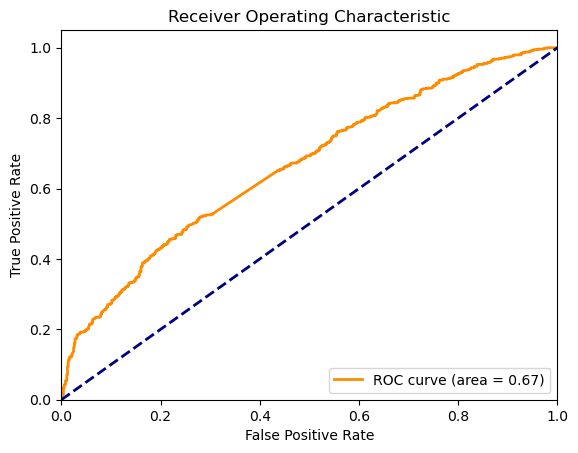

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,confusion_matrix
import matplotlib.pyplot as plt



y_pred = consp_classifier.predict(X_test_tfidf)

# performance metrics: 
# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_encoded, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_encoded, y_pred)
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test_encoded, y_pred)
print(f"F1 Score: {f1}")

# ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, consp_classifier.predict_proba(X_test_tfidf)[:, 1])
print(f"ROC-AUC: {roc_auc}")

# Plot ROC curve
fp, tp, thresholds = roc_curve(y_test_encoded, consp_classifier.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fp, tp)

plt.figure()
plt.plot(
        fp, 
        tp, 
        color='darkorange',
        lw=2, 
        label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [12]:
import joblib

# Save the TF-IDF vectorizer model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Save the model
joblib.dump(consp_classifier, 'consp_classifier.joblib')



['consp_classifier.joblib']